In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
from scipy.integrate import odeint
import time


In [15]:
dec_factor = 0.0001
board_size = 30
max_t = 200

In [4]:
def temp_dec(temp):
    return temp - (temp * (dec_factor))

In [5]:
res = []
temp = max_t
while(temp>=1):
    res.append(temp)
    temp = temp_dec(temp)

In [6]:
times_ = [i for i in range(len(res))]

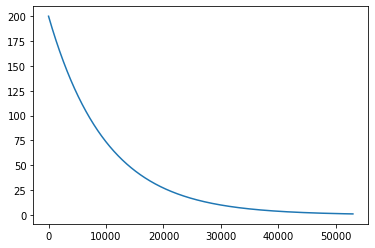

In [7]:
plt.plot(times_,res)

In [8]:
def acc_or_rej(delta):
    if delta < 0:
        return True
    else :
        p = np.exp((-1 *  delta / temp) )
        if temp < 5 :
            r = np.power(rnd.uniform(0,1),2)
        else: r = rnd.uniform(0,1)
        return p>r

In [9]:
def get_random_queens() -> []:
        new = [i for i in range(board_size)]
        rnd.shuffle(new)
        return new

In [10]:
def _cost(_queens):
    energy = 0
    queen_att = [[i,0] for i in range(board_size)]
    for i in range(board_size - 1):
        for j in range(i + 1, board_size):
            if attack(i,_queens[i],j,_queens[j]):
                energy += 1
                queen_att[i][1]+=1
                queen_att[j][1]+=1
    queen_att.sort(key=lambda x: x[1], reverse=True)          
    return energy , queen_att 
            

In [11]:
 def attack(first_i: int, first_j: int, second_i: int, second_j: int) -> bool:
        if np.abs(first_i - second_i) == np.abs(first_j - second_j):
            return True
        return False

In [12]:
def pick_random_indexes():
    r1 = rnd.uniform(0,1)
    r2 = rnd.uniform(0,1)
    index_1 = int(np.power(r1,10) * board_size)
    index_2 = int(np.power(r2,10) * board_size)
    if index_1 != index_2:
        return index_1, index_2
    else:
        return pick_random_indexes()

In [13]:
t_start = time.time()
queens : [int] = get_random_queens()
temp = max_t
current_cost , q_att = _cost(queens)
temp_change = [current_cost]

while temp >=1:
        
    new_queens = queens
    
    i_1, i_2 = pick_random_indexes()
    temp_ = new_queens[q_att[i_1][0]]
    new_queens[q_att[i_1][0]] = queens[q_att[i_2][0]]
    new_queens[q_att[i_2][0]] = temp_

    c2 , q_2_att = _cost(new_queens)
    
    
    if c2 == 0:
        queens = new_queens
        temp_change.append(c2)
        break
        
    if acc_or_rej(c2 - current_cost):
        queens = new_queens
        q_att = q_2_att
        current_cost = c2
        temp_change.append(c2)
        
    temp = temp_dec(temp)

t_end = time.time()
print(t_end - t_start)

3.6742124557495117


In [112]:
rows, cols = (board_size, board_size)
n_queen = [[0 for i in range(cols)] for j in range(rows)]

for i in range(board_size):
    n_queen[i][queens[i]] = 1

for i in n_queen:
    print(i)

x , t = _cost(queens)
print(x)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

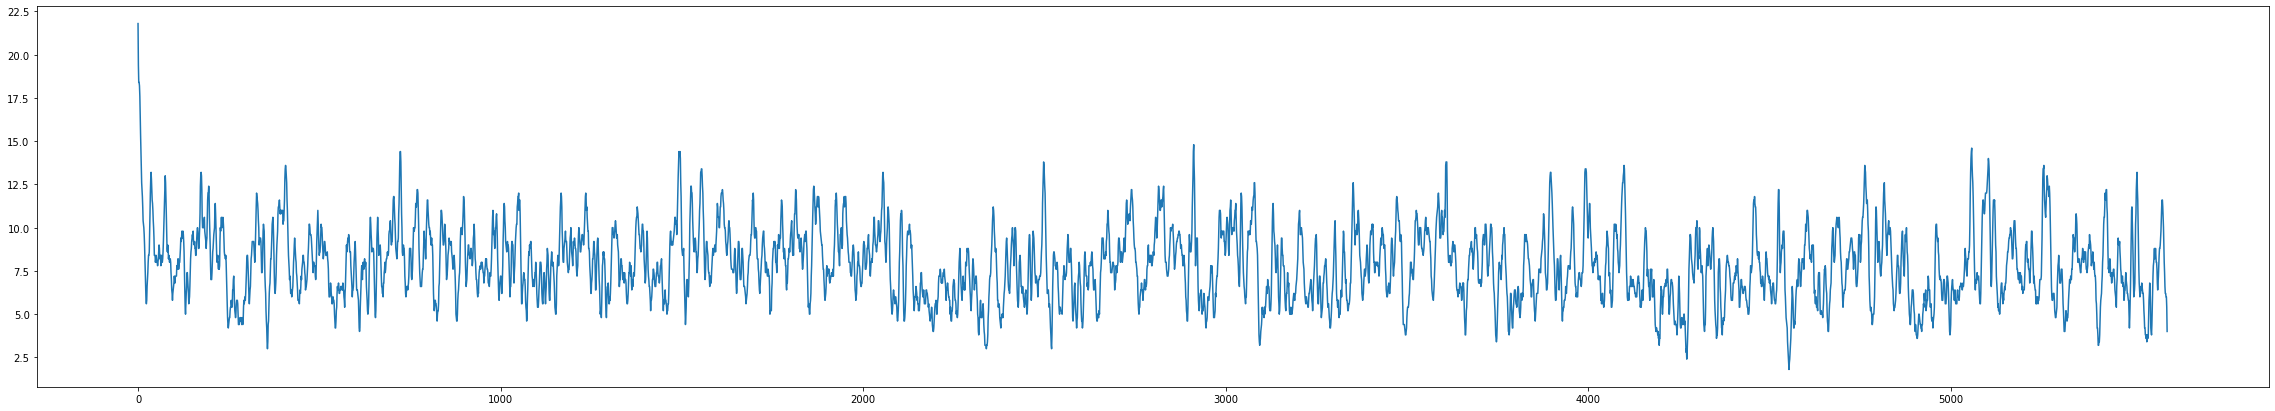

In [14]:
w = int(len(temp_change)/1000)
mov_temp_change = np.convolve(temp_change, np.ones(w), 'valid') / w

times = [i for i in range(len(mov_temp_change))]
plt.figure(figsize=(40,7))
plt.plot(times, mov_temp_change)